**Context**

Analysts are required to explore data and reflect on the insights. Clear writing skill is an integral part of a good report. Note that the explanations must be such that readers with minimum knowledge of analytics are able to grasp the insight.
Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.


**Objective**

They want to analyze the data to get a fair idea about the demand of customers which will help them in enhancing their customer experience. Suppose you are a Data Scientist at the company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.


**Data Description**

**Age:** The age of the individual in years.

**Gender:** The gender of the individual, categorized as male or female.

**Profession:** The occupation or profession of the individual.

**Marital_status:** The marital status of the individual, such as married &, single

**Education:** The educational qualification of the individual Graduate and Post Graduate

**No_of_Dependents:** The number of dependents (e.g., children, elderly parents) that the individual supports financially.

**Personal_loan:** A binary variable indicating whether the individual has taken a personal loan "Yes" or "No"

**House_loan:** A binary variable indicating whether the individual has taken a housing loan "Yes" or "No"

**Partner_working:** A binary variable indicating whether the individual's partner is employed "Yes" or "No"

**Salary:** The individual's salary or income.

**Partner_salary:** The salary or income of the individual's partner, if applicable.

**Total_salary:** The total combined salary of the individual and their partner (if applicable).

**Price:** The price of a product or service.

**Make:** The type of automobile

**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Loading the data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Code_with_python/PDS_PROJECT/Austo_automobile.csv')

**Data Overvieww**

In [4]:
df = data.copy()

In [5]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [6]:
df.tail()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback
1580,22,Male,Salaried,Married,Graduate,4,No,No,No,31600,0.0,31600,31000,Hatchback


**Checking the shape of the dataset**

In [7]:
df.shape

(1581, 14)

*The dataset has 1581 rows and 14 columns*

**Checking the data types of the columns for the dataset**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB




*   All the columns have 1581 observations except gender and partner salary which has 1528 and 1475 observations indicating that there are some missing values in them




**Getting the statistical summary for the dataset**

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1475.0,20225.559322,19573.149277,0.0,0.0,25600.0,38300.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


In [10]:
df.isnull().sum()

,0
Age,0
Gender,53
Profession,0
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,0


In [11]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


<ipython-input-11-90613879d37d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


In [12]:
df.dropna(subset=['Gender'], inplace=True)


In [13]:
df['Partner_salary'].fillna(df['Partner_salary'].median(), inplace=True)


<ipython-input-13-f299fc5b2364>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Partner_salary'].fillna(df['Partner_salary'].median(), inplace=True)


In [14]:
df.isnull().sum()

,0
Age,0
Gender,0
Profession,0
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,0


In [15]:
# Fix typographical error in 'Gender'
df['Gender'] = df['Gender'].replace('Femal', 'Female')
df['Gender'] = df['Gender'].replace('Femle', 'Female')

# For 'Gender', we'll fill with the most frequent value (mode)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

# For 'Partner_salary', since it's a numeric column and has 0 as a valid value,
# we'll fill missing values with the median to avoid bias from outliers
df['Partner_salary'].fillna(df['Partner_salary'].median(), inplace=True)

# Confirm that missing values have been handled
missing_values_after = df.isnull().sum()

# Show the unique values in the 'Gender' column after corrections
unique_genders = df['Gender'].unique()

missing_values_after, unique_genders

<ipython-input-15-66d747300094>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
<ipython-input-15-66d747300094>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

(Age                 0
 Gender              0
 Profession          0
 Marital_status      0
 Education           0
 No_of_Dependents    0
 Personal_loan       0
 House_loan          0
 Partner_working     0
 Salary              0
 Partner_salary      0
 Total_salary        0
 Price               0
 Make                0
 dtype: int64,
 array(['Male', 'Female'], dtype=object))

**UNIVARIATE ANALYSIS**

*Explore all the variables categorical in the data.*

Summary statistics for Age:
count    1581.000000
mean       31.922201
std         8.425978
min        22.000000
25%        25.000000
50%        29.000000
75%        38.000000
max        54.000000
Name: Age, dtype: float64


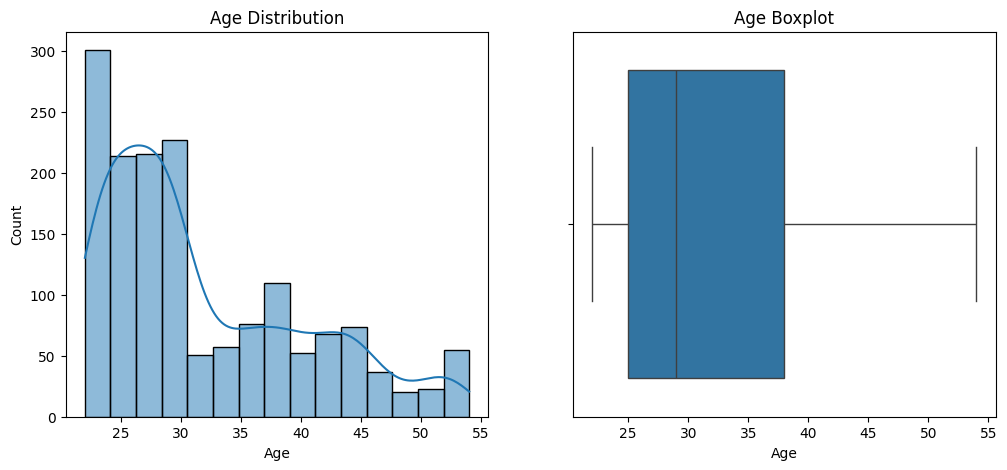

Number of outliers in Age: 0
Empty DataFrame
Columns: [Age, Gender, Profession, Marital_status, Education, No_of_Dependents, Personal_loan, House_loan, Partner_working, Salary, Partner_salary, Total_salary, Price, Make]
Index: []
Summary statistics for No_of_Dependents:
count    1581.000000
mean        2.457938
std         0.943483
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: No_of_Dependents, dtype: float64


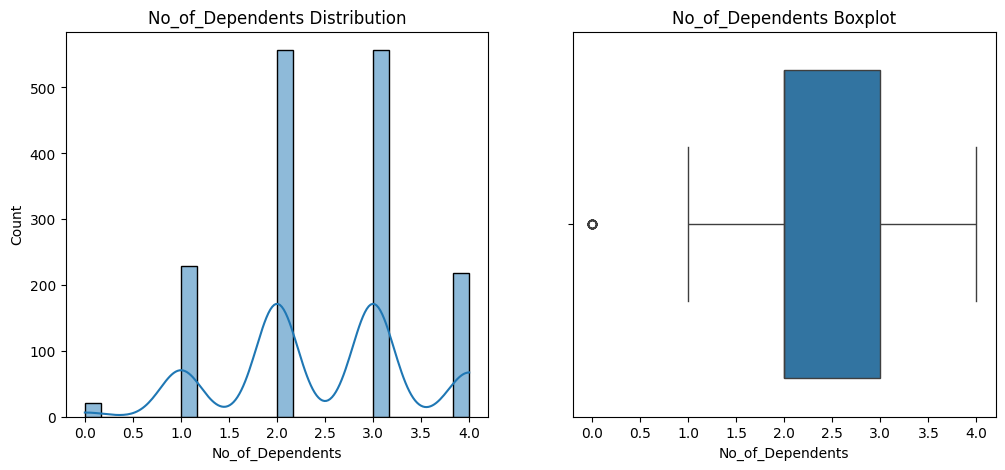

Number of outliers in No_of_Dependents: 20
      Age  Gender Profession Marital_status      Education  No_of_Dependents  \
93     51    Male   Salaried         Single  Post Graduate                 0   
128    47  Female   Business         Single       Graduate                 0   
138    46  Female   Salaried         Single  Post Graduate                 0   
203    44    Male   Salaried         Single  Post Graduate                 0   
462    36  Female   Salaried         Single  Post Graduate                 0   
701    30    Male   Business         Single  Post Graduate                 0   
826    29    Male   Salaried         Single  Post Graduate                 0   
912    28    Male   Business         Single  Post Graduate                 0   
936    28    Male   Business         Single  Post Graduate                 0   
1020   27    Male   Salaried         Single  Post Graduate                 0   
1049   27    Male   Business         Single  Post Graduate                 0 

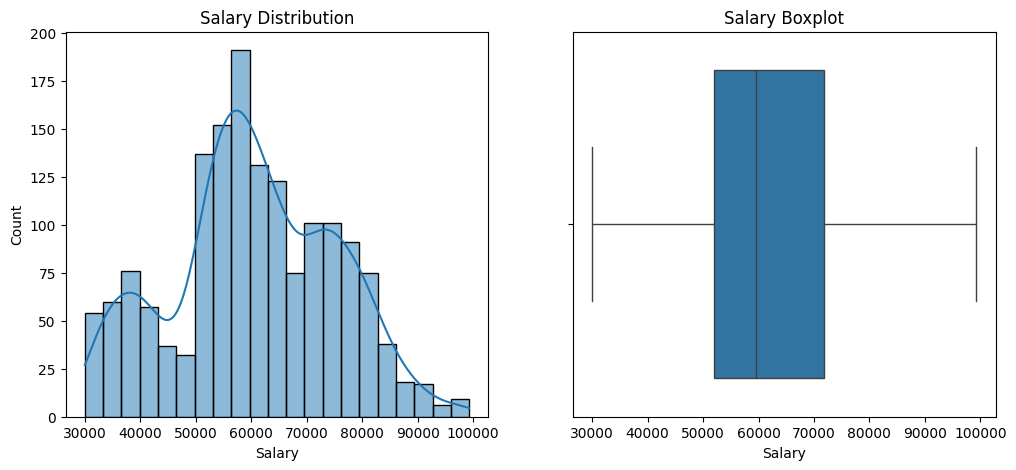

Number of outliers in Salary: 0
Empty DataFrame
Columns: [Age, Gender, Profession, Marital_status, Education, No_of_Dependents, Personal_loan, House_loan, Partner_working, Salary, Partner_salary, Total_salary, Price, Make]
Index: []
Summary statistics for Partner_salary:
count     1581.000000
mean     20585.895003
std      18952.938643
min          0.000000
25%          0.000000
50%      25600.000000
75%      38000.000000
max      80500.000000
Name: Partner_salary, dtype: float64


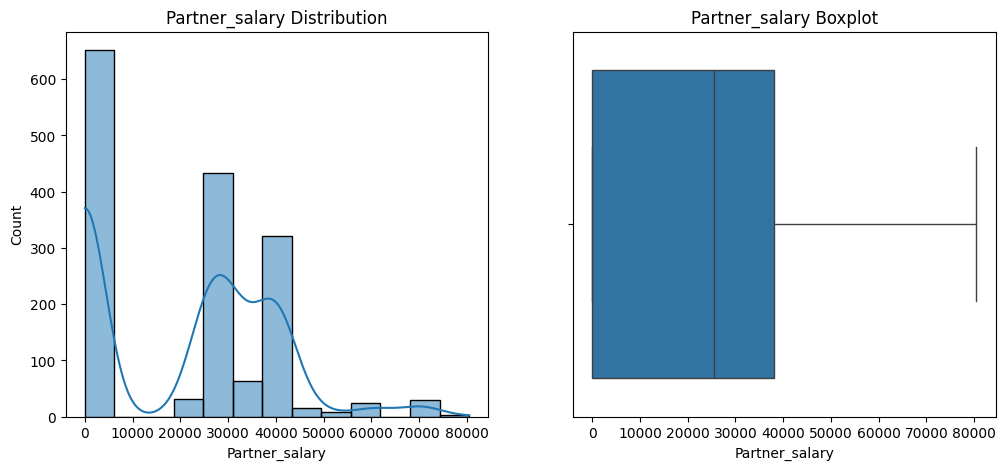

Number of outliers in Partner_salary: 0
Empty DataFrame
Columns: [Age, Gender, Profession, Marital_status, Education, No_of_Dependents, Personal_loan, House_loan, Partner_working, Salary, Partner_salary, Total_salary, Price, Make]
Index: []
Summary statistics for Total_salary:
count      1581.000000
mean      79625.996205
std       25545.857768
min       30000.000000
25%       60500.000000
50%       78000.000000
75%       95900.000000
max      171000.000000
Name: Total_salary, dtype: float64


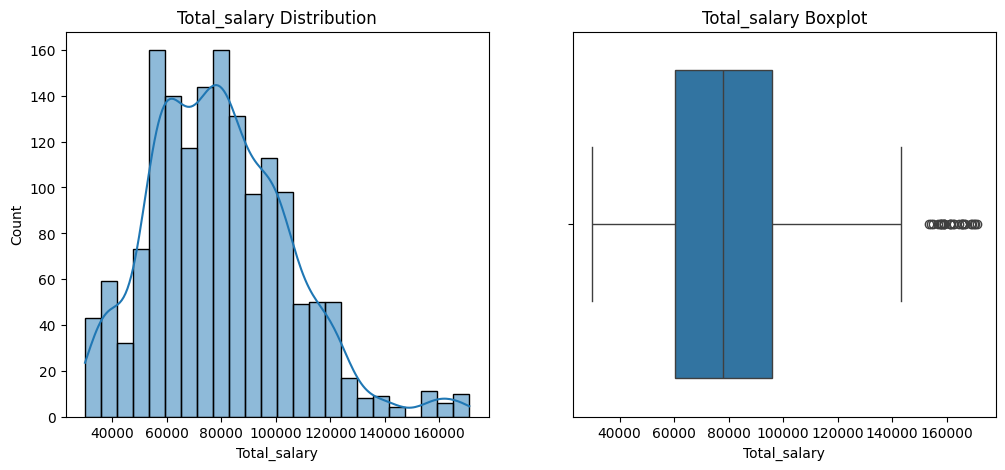

Number of outliers in Total_salary: 27
     Age  Gender Profession Marital_status      Education  No_of_Dependents  \
0     53    Male   Business        Married  Post Graduate                 4   
1     53  Female   Salaried        Married  Post Graduate                 4   
2     53  Female   Salaried        Married  Post Graduate                 3   
17    49  Female   Salaried        Married  Post Graduate                 4   
18    49  Female   Business        Married  Post Graduate                 3   
19    49    Male   Salaried        Married  Post Graduate                 3   
29    46  Female   Salaried        Married  Post Graduate                 2   
30    46    Male   Salaried        Married  Post Graduate                 4   
31    46    Male   Business        Married       Graduate                 2   
41    53  Female   Salaried        Married  Post Graduate                 4   
42    52  Female   Salaried        Married  Post Graduate                 3   
49    52  Fem

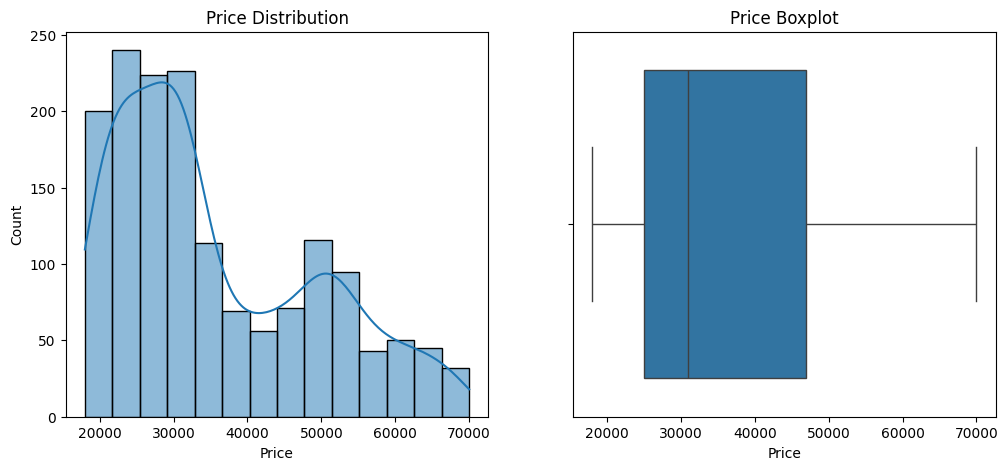

Number of outliers in Price: 0
Empty DataFrame
Columns: [Age, Gender, Profession, Marital_status, Education, No_of_Dependents, Personal_loan, House_loan, Partner_working, Salary, Partner_salary, Total_salary, Price, Make]
Index: []


In [16]:
def univariate_analysis_numeric(data, column):
    print(f"Summary statistics for {column}:")
    print(data[column].describe())

    # Plotting
    plt.figure(figsize=(12, 5))
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'{column} Distribution')
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f'{column} Boxplot')
    plt.show()

    # Detect and treat outliers using IQR method
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"Number of outliers in {column}: {len(outliers)}")
    print(outliers)

# Apply this function to all numeric columns
numeric_columns = ['Age', 'No_of_Dependents', 'Salary', 'Partner_salary', 'Total_salary', 'Price']
for column in numeric_columns:
    univariate_analysis_numeric(df, column)





*Explore all the variables numerical in the data.*


Frequency distribution for Gender:
Gender
Male      1252
Female     329
Name: count, dtype: int64


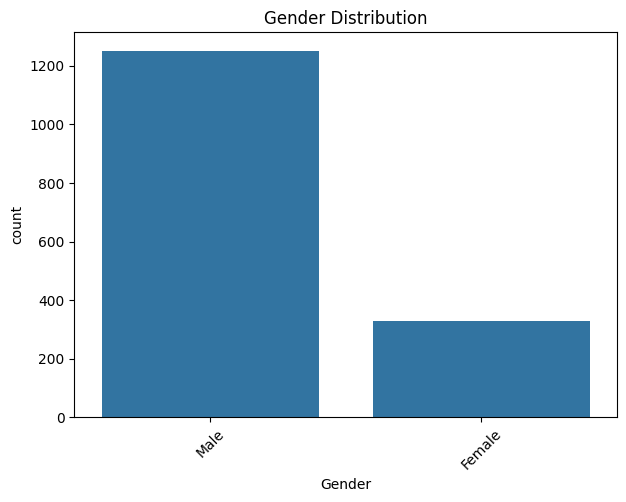

Frequency distribution for Profession:
Profession
Salaried    896
Business    685
Name: count, dtype: int64


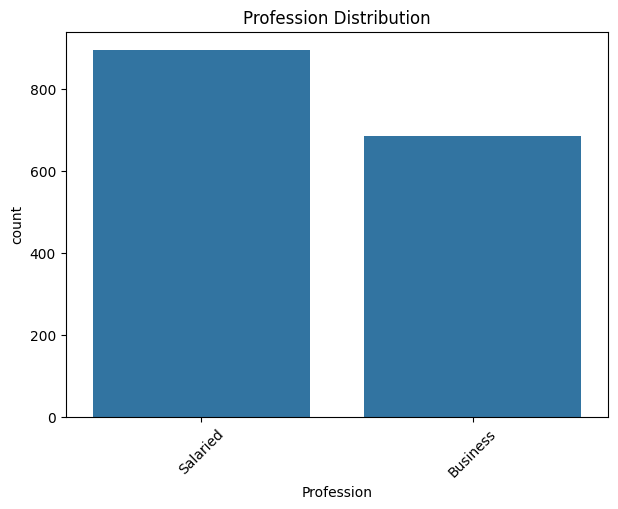

Frequency distribution for Marital_status:
Marital_status
Married    1443
Single      138
Name: count, dtype: int64


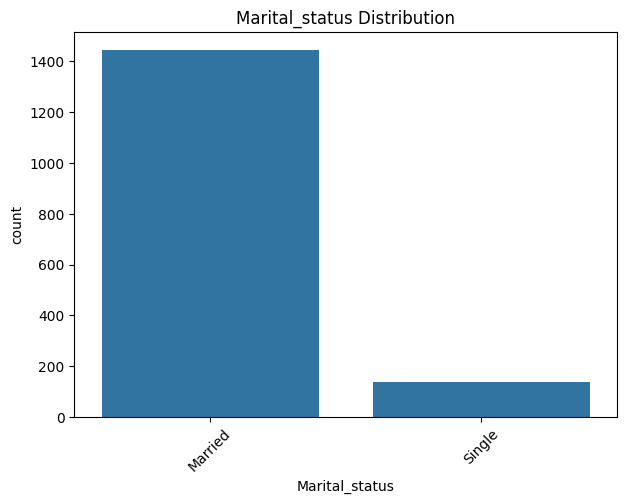

Frequency distribution for Education:
Education
Post Graduate    985
Graduate         596
Name: count, dtype: int64


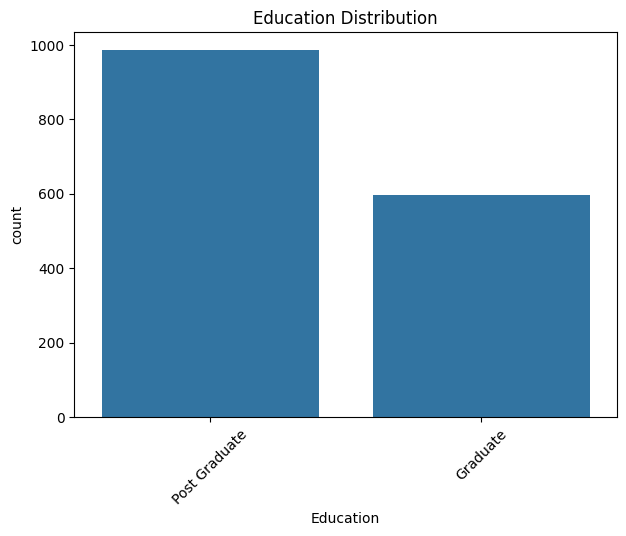

Frequency distribution for Personal_loan:
Personal_loan
Yes    792
No     789
Name: count, dtype: int64


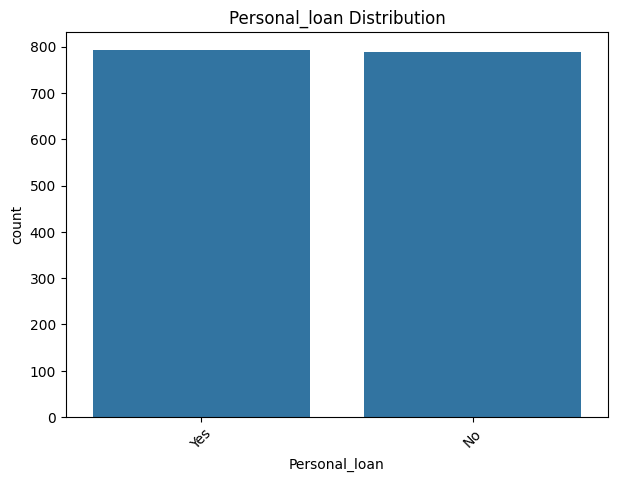

Frequency distribution for House_loan:
House_loan
No     1054
Yes     527
Name: count, dtype: int64


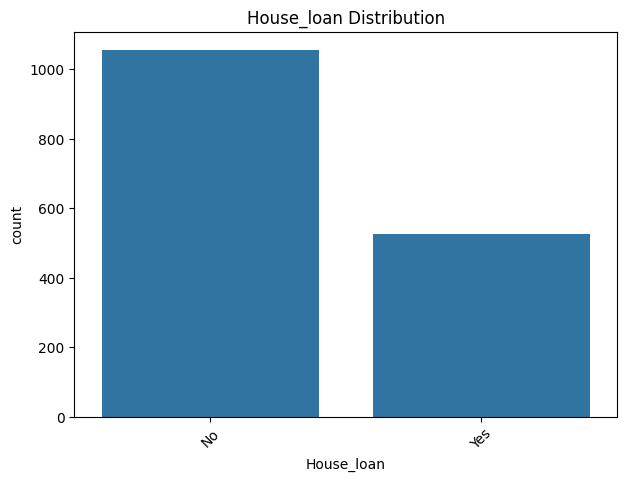

Frequency distribution for Partner_working:
Partner_working
Yes    868
No     713
Name: count, dtype: int64


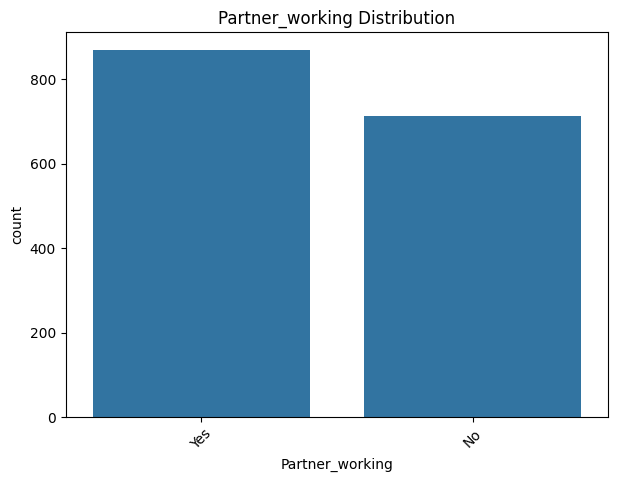

Frequency distribution for Make:
Make
Sedan        702
Hatchback    582
SUV          297
Name: count, dtype: int64


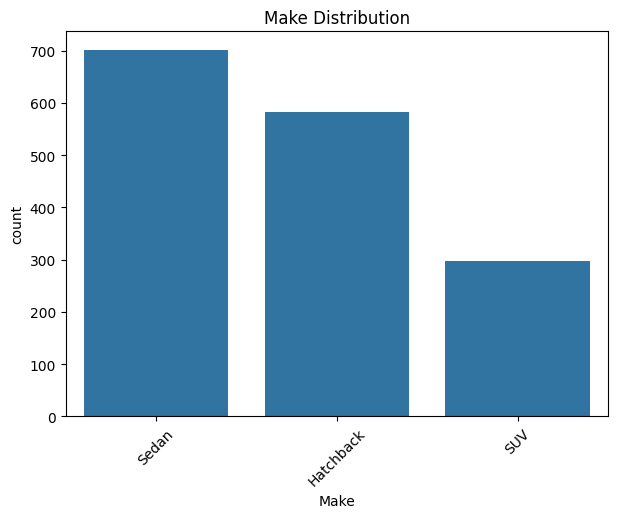

In [17]:
def univariate_analysis_categorical(data, column):
    print(f"Frequency distribution for {column}:")
    print(data[column].value_counts())

    # Plotting
    plt.figure(figsize=(7, 5))
    sns.countplot(x=data[column], order=data[column].value_counts().index)
    plt.title(f'{column} Distribution')
    plt.xticks(rotation=45)
    plt.show()

# Apply this function to all categorical columns
categorical_columns = ['Gender', 'Profession', 'Marital_status', 'Education',
                       'Personal_loan', 'House_loan', 'Partner_working', 'Make']

for column in categorical_columns:
    univariate_analysis_categorical(df, column)


**Bivariate Analysis**

*Scatter Plots Between Numerical Variables:
Scatter plots show relationships between two numerical variables. For instance, we might want to see if there is a relationship between Salary and Age.*

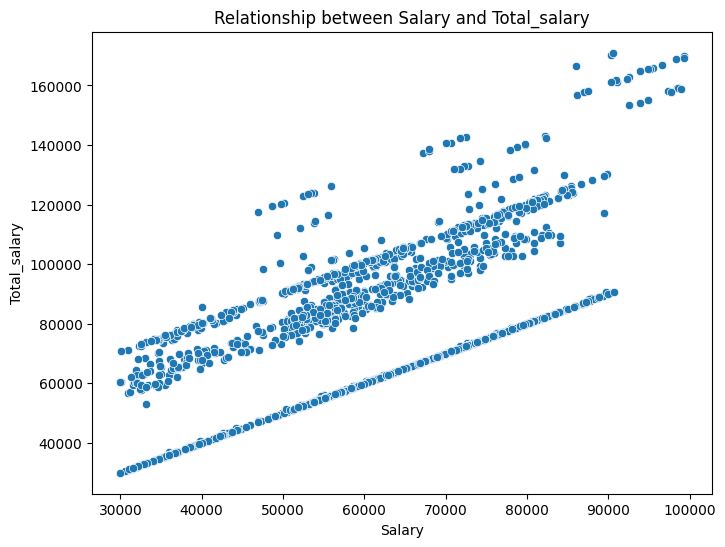

In [18]:
def scatter_plot_numeric(df, var1, var2):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[var1], y=df[var2])
    plt.title(f'Relationship between {var1} and {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()

scatter_plot_numeric(df, 'Salary', 'Total_salary')


*Correlation Matrix:
A correlation matrix shows the correlation between all numerical variables. We can visualize it using a heatmap.*

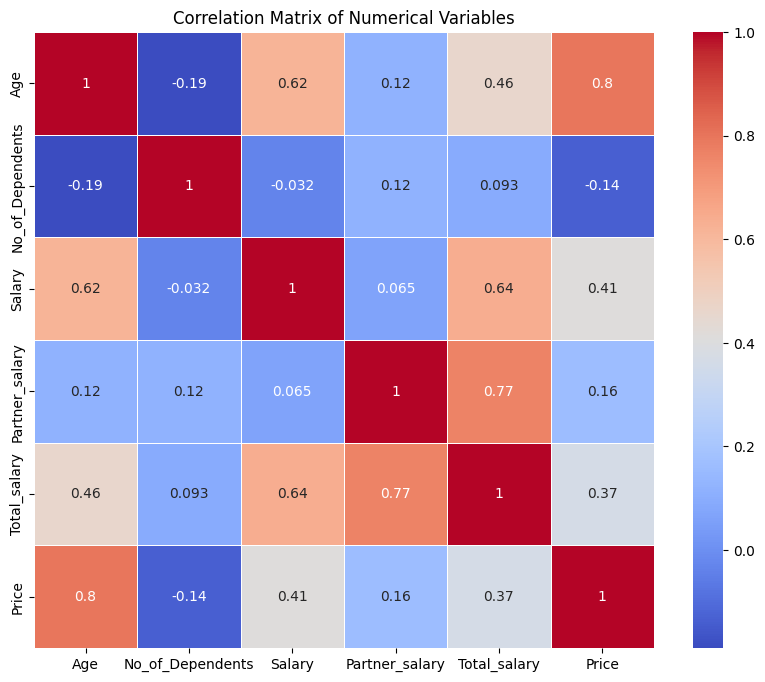

In [19]:
correlation_matrix = df[['Age', 'No_of_Dependents', 'Salary', 'Partner_salary', 'Total_salary', 'Price']].corr()

# Plot a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


*Boxplots: Categorical vs Numerical Variables:
Boxplots are useful to visualize how a numerical variable differs across categories.*

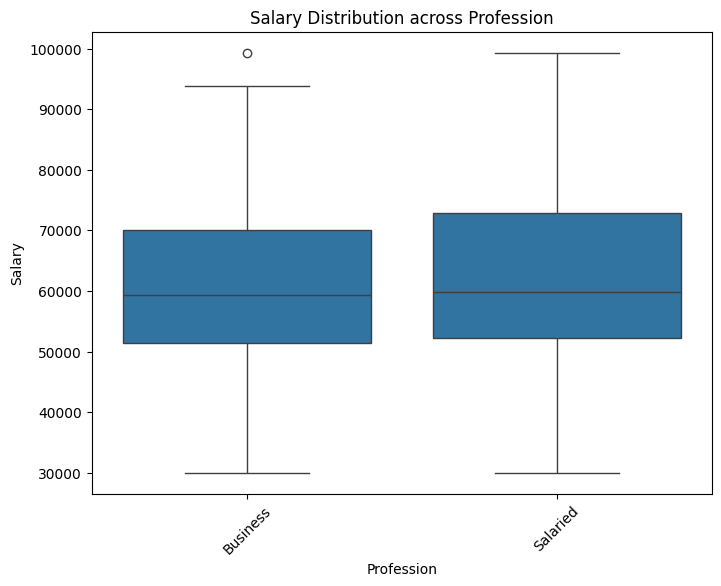

In [20]:
def boxplot_categorical_vs_numerical(df, categorical_var, numerical_var):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=categorical_var, y=numerical_var, data=df)
    plt.title(f'{numerical_var} Distribution across {categorical_var}')
    plt.xticks(rotation=45)
    plt.show()

boxplot_categorical_vs_numerical(df, 'Profession', 'Salary')


**Key Questions**


1.   Do men tend to prefer SUVs more compared to women?
2.   What is the likelihood of a salaried person buying a Sedan?

1.   What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?
2.   How does the the amount spent on purchasing automobiles vary by gender?

1.   How much money was spent on purchasing automobiles by individuals who took a personal loan?
6. How does having a working partner influence the purchase of higher-priced cars?









Crosstab of Gender vs Car Type (Make):
Make    Hatchback  SUV  Sedan
Gender                       
Female         15  173    141
Male          567  124    561

Proportion of SUV preference by gender:
Gender
Female    0.525836
Male      0.099042
Name: SUV, dtype: float64


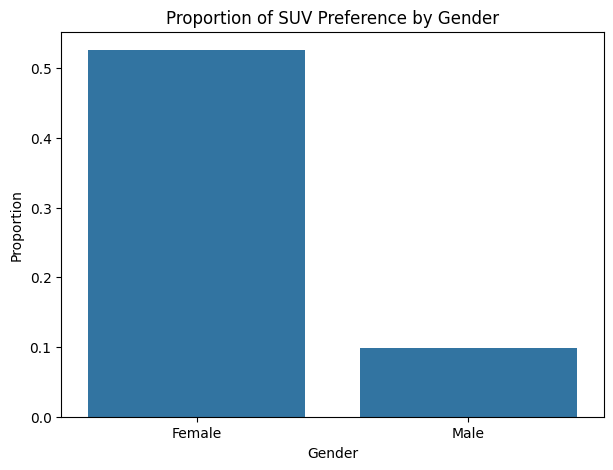

In [21]:
#question 1
# Crosstabulation to see the relationship between Gender and Make (Car Type)
gender_vs_car = pd.crosstab(df['Gender'], df['Make'])

# Calculate the proportion of each gender that prefers SUVs
gender_suv_proportion = gender_vs_car.div(gender_vs_car.sum(axis=1), axis=0)['SUV']

# Display the crosstab and proportions
print("Crosstab of Gender vs Car Type (Make):")
print(gender_vs_car)

print("\nProportion of SUV preference by gender:")
print(gender_suv_proportion)

# Visualize with a bar plot
plt.figure(figsize=(7, 5))
sns.barplot(x=gender_suv_proportion.index, y=gender_suv_proportion.values)
plt.title('Proportion of SUV Preference by Gender')
plt.ylabel('Proportion')
plt.show()


In [22]:
# question 2
# Crosstab to show the relationship between Profession and Make (Car Type)
profession_vs_car = pd.crosstab(df['Profession'], df['Make'])

# Calculate the total number of salaried people and the number of salaried people who own a Sedan
total_salaried = profession_vs_car.loc['Salaried'].sum()
salaried_sedan_owners = profession_vs_car.loc['Salaried', 'Sedan']

# Calculate the likelihood (proportion)
likelihood_salaried_sedan = salaried_sedan_owners / total_salaried

# Display the result
print(f"Total number of salaried individuals: {total_salaried}")
print(f"Number of salaried individuals who own a Sedan: {salaried_sedan_owners}")
print(f"Likelihood of a salaried person buying a Sedan: {likelihood_salaried_sedan:.2f}")


Total number of salaried individuals: 896
Number of salaried individuals who own a Sedan: 396
Likelihood of a salaried person buying a Sedan: 0.44


In [23]:
#question 3
# Filter for salaried males
salaried_males = df[(df['Gender'] == 'Male') & (df['Profession'] == 'Salaried')]

# Crosstab to show the relationship between Gender, Profession, and Car Make
salaried_males_vs_car = pd.crosstab(salaried_males['Gender'], salaried_males['Make'])

# Calculate the proportion of salaried males who own SUVs and Sedans
salaried_male_suv_owners = salaried_males_vs_car['SUV'].sum()
salaried_male_sedan_owners = salaried_males_vs_car['Sedan'].sum()
total_salaried_males = salaried_male_suv_owners + salaried_male_sedan_owners

# Likelihood of a salaried male buying an SUV
likelihood_suv_salaried_male = salaried_male_suv_owners / total_salaried_males

# Likelihood of a salaried male buying a Sedan
likelihood_sedan_salaried_male = salaried_male_sedan_owners / total_salaried_males

# Display results
print(f"Total salaried males: {total_salaried_males}")
print(f"Number of salaried males who own an SUV: {salaried_male_suv_owners}")
print(f"Number of salaried males who own a Sedan: {salaried_male_sedan_owners}")
print(f"Likelihood of salaried males buying an SUV: {likelihood_suv_salaried_male:.2f}")
print(f"Likelihood of salaried males buying a Sedan: {likelihood_sedan_salaried_male:.2f}")


Total salaried males: 395
Number of salaried males who own an SUV: 90
Number of salaried males who own a Sedan: 305
Likelihood of salaried males buying an SUV: 0.23
Likelihood of salaried males buying a Sedan: 0.77


In [24]:
#question 4
# Summary statistics for car prices by gender
gender_price_summary = df.groupby('Gender')['Price'].agg(['count', 'mean', 'median', 'sum'])

# Display summary statistics
print("Summary statistics for car prices by gender:")
print(gender_price_summary)


Summary statistics for car prices by gender:
        count          mean   median       sum
Gender                                        
Female    329  47705.167173  49000.0  15695000
Male     1252  32416.134185  29000.0  40585000


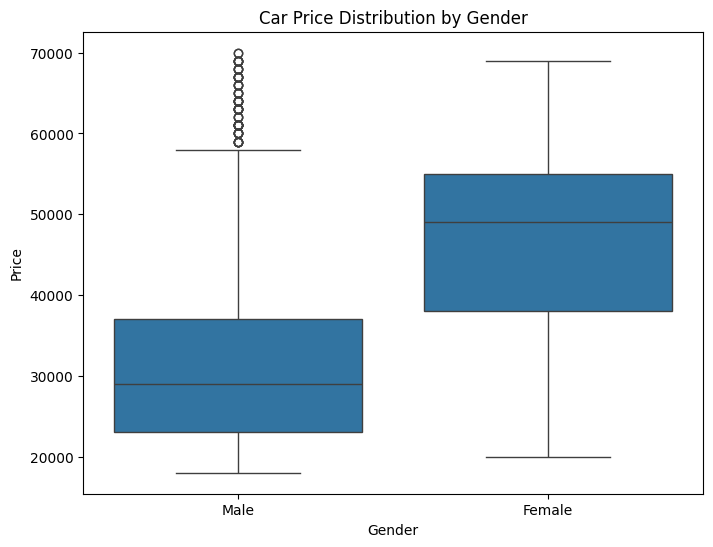

In [25]:
# Boxplot to visualize the distribution of car prices by gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Price', data=df)
plt.title('Car Price Distribution by Gender')
plt.ylabel('Price')
plt.show()


In [26]:
#question 5
# Total amount spent on cars by individuals with a personal loan
total_spent_personal_loan = df[df['Personal_loan'] == 'Yes']['Price'].sum()

# Display the total spent
print(f"Total amount spent on automobiles by individuals with a personal loan: ${total_spent_personal_loan:.2f}")



Total amount spent on automobiles by individuals with a personal loan: $27290000.00


Summary statistics for car prices based on partner working status:
                         mean   median  count
Partner_working                              
No               36000.000000  31000.0    713
Yes              35267.281106  31000.0    868


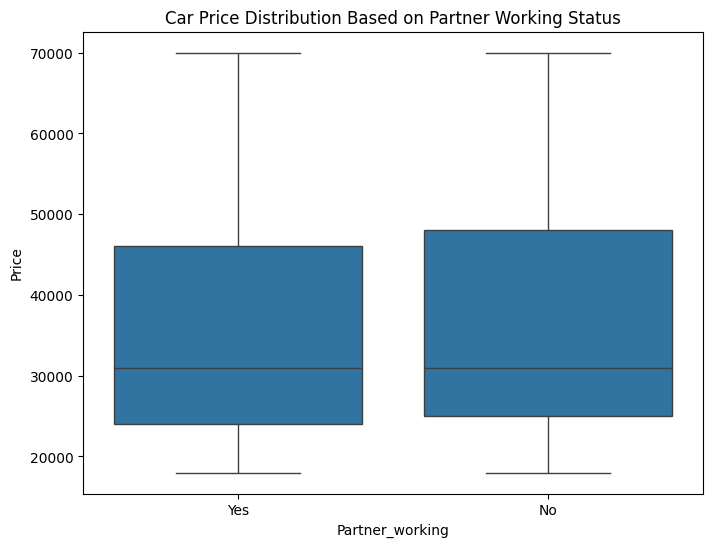

In [27]:
#question 6
# Group by working partner status and calculate average and median prices
partner_price_summary = df.groupby('Partner_working')['Price'].agg(['mean', 'median', 'count'])

# Display the summary statistics
print("Summary statistics for car prices based on partner working status:")
print(partner_price_summary)

# Boxplot to visualize the distribution of car prices based on partner working status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Partner_working', y='Price', data=df)
plt.title('Car Price Distribution Based on Partner Working Status')
plt.ylabel('Price')
plt.show()


**Actionable Insights - Business Recommendations**



*   Salaried Males: Since salaried males tend to prefer SUVs, automotive marketers can design targeted campaigns highlighting the benefits of SUVs for families and active lifestyles. Promotional events can feature test drives and family-oriented marketing materials to attract this demographic.
*   Personal Loan Holders: A segment of individuals who take personal loans appears to spend significantly on automobiles. Offering financing options, such as low-interest loans or leasing deals, can help capture this market.

*   SUV Variants: Considering the higher preference for SUVs, dealerships should increase their inventory of SUVs and promote different variants to cater to diverse preferences, such as luxury SUVs or eco-friendly models.
*   Personal Loan Partnerships: Partner with banks and financial institutions to offer customers easier access to personal loans, enhancing the affordability of higher-priced vehicles. This could include exclusive loan offers for dealership customers.

**Conclusion**

By implementing these recommendations, automotive businesses can enhance their market positioning, better meet customer needs, and ultimately drive sales growth. Adjusting strategies based on customer demographics and preferences can create a more personalized buying experience, leading to increased customer loyalty and satisfaction.





